<a href="https://colab.research.google.com/github/leadeeerq/data-science/blob/main/Stock_price_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock price prediciton

In [134]:
!pip install Quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [135]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

##Import df from Quandl

In [136]:
# data = quandl.get('WIKI/GOOGL')
# data.to_csv('googl.csv')
df = pd.read_csv('googl.csv', index_col='Date', parse_dates=True)

In [137]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [138]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [139]:
df['pct_HL'] = (df['Adj. High'] - df['Adj. Low'])/df['Adj. Low'] * 100.0 #daily volatility/zmienność w ciągu dnia
# df['pct_HL'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close'] * 100.0
df['pct_change'] = (df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open'] * 100.0

In [140]:
df = df[['Adj. Close', 'pct_HL', 'pct_change', 'Adj. Volume']]
df.head()

,Adj. Close,pct_HL,pct_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0
2004-08-20,54.322689,8.537313,7.227007,22834300.0
2004-08-23,54.869377,4.062357,-1.227880,18256100.0
2004-08-24,52.597363,7.753210,-5.726357,15247300.0
2004-08-25,53.164113,3.966115,1.183658,9188600.0


In [141]:
forecast_col = 'Adj. Close'

###Filling nans with outliers (-99999)

In [142]:
df.fillna(-99999, inplace = True) 

###Forecast_out - predicting 0.1 of quantity of data fed

In [143]:
forecast_out = int(math.ceil(0.01 * len(df))) #Wykorzystanie x dni poprzedzających do predykcji dzisiejszego dnia
forecast_out

35

In [144]:
df['label'] = df[forecast_col].shift(-forecast_out) #Przesunięcie wyników Adj.Close o x w górę, aby mieć informację o cenie akcji po x dniach; usunięcie x pierwszych wierszy

In [145]:
df.head()

,Adj. Close,pct_HL,pct_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849


##Train, test split

In [146]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace = True)

y = np.array(df['label'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [147]:
print(len(X), len(y))

3389 3389


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

##Classifier

###Linear Regression

In [149]:
clf = LinearRegression(n_jobs = -1)
clf.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [150]:
accuracy = clf.score(X_test, y_test)
accuracy

0.980425358058938

###SVR

In [151]:
# clf = svm.SVR(kernel = 'poly')
# clf.fit(X_train, y_train)
# accuracy = clf.score(X_test, y_test)
# accuracy

##Predicition

In [152]:
forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1100.20896999 1072.49237792 1018.67375458 1058.07716406 1073.16236908
 1073.81464154 1091.54758908 1110.19695126 1115.23538119 1122.75475264
 1132.60069459 1129.46180764 1148.1712918  1164.44366247 1136.00458041
 1122.53174119 1087.31515947 1101.99139475 1113.71830001 1121.42426546
 1134.54517752 1150.02859802 1180.64656564 1186.17225961 1157.11951083
 1169.14900154 1170.11989406 1153.20288828 1117.86327081 1114.60063551
 1113.24865793 1069.7257196  1042.367242   1069.64914631 1019.14125682] 0.980425358058938 35


##Forecasting, graph

1.   Dodanie pustej kolumny 'Forecast' do df'a
2.   Zapełnienie kolumny danymi - do daty wyższej niż 'last_date' wpisana jest wartość prognozy z tablicy forecast_set
3. 'df.loc[next_date]' to indeks df'a
4. df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i] - wypełnienie komórek listą wartości np.NaN i dodanie na końcu wartości z 'forecast_set'


In [153]:
df['Forecast'] = np.nan

In [154]:
last_date = df.iloc[-1].name #Ostatnia data
last_unix = last_date.timestamp()
one_day = 86400 #sekund
next_unix = last_unix + one_day

In [155]:
last_date

Timestamp('2018-02-05 00:00:00')

In [156]:
forecast_set

array([1100.20896999, 1072.49237792, 1018.67375458, 1058.07716406,
       1073.16236908, 1073.81464154, 1091.54758908, 1110.19695126,
       1115.23538119, 1122.75475264, 1132.60069459, 1129.46180764,
       1148.1712918 , 1164.44366247, 1136.00458041, 1122.53174119,
       1087.31515947, 1101.99139475, 1113.71830001, 1121.42426546,
       1134.54517752, 1150.02859802, 1180.64656564, 1186.17225961,
       1157.11951083, 1169.14900154, 1170.11989406, 1153.20288828,
       1117.86327081, 1114.60063551, 1113.24865793, 1069.7257196 ,
       1042.367242  , 1069.64914631, 1019.14125682])

In [157]:
for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

In [160]:
df[-40:-30]

,Adj. Close,pct_HL,pct_change,Adj. Volume,label,Forecast
Date,,,,,,
2018-01-30,1177.37,1.142604,-0.029718,1792602.0,1094.00,NaN
2018-01-31,1182.22,1.213207,-0.134312,1643877.0,1053.15,NaN
2018-02-01,1181.59,1.547000,0.476195,2774967.0,1026.55,NaN
2018-02-02,1119.20,1.811604,-0.729098,5798880.0,1054.09,NaN
2018-02-05,1068.76,5.512236,-2.893850,3742469.0,1006.94,NaN
2018-02-06,NaN,NaN,NaN,NaN,NaN,1100.208970
2018-02-07,NaN,NaN,NaN,NaN,NaN,1072.492378
2018-02-08,NaN,NaN,NaN,NaN,NaN,1018.673755
2018-02-09,NaN,NaN,NaN,NaN,NaN,1058.077164


Text(0, 0.5, 'Price')

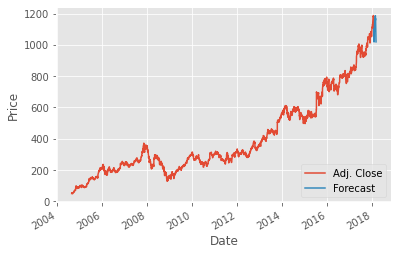

In [161]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')